In [1]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load("word2vec_ENwiki.model")
similarity=[]
similarity.append(model.wv.similarity("drinks",'sevenup'))
similarity.append(model.wv.similarity("drinks",'sprite'))
similarity.append(model.wv.similarity("drinks",'pepsi'))
similarity.append(model.wv.similarity("drinks",'coke'))
similarity.append(model.wv.similarity("drinks",'cappuccino'))
similarity.append(model.wv.similarity("drinks",'espresso'))
similarity.append(model.wv.similarity("drinks",'latte'))
print(similarity)

[0.0058737546, 0.29895577, 0.44666752, 0.35019508, 0.6304871, 0.5540402, 0.48425618]


In [2]:
data=[
    ['7Up',similarity[0],7,100,200,500,1000,300],
    ['Sprite',similarity[1],6,200,10,500,1000,150],
    ['Pepsi',similarity[2],5,200,10,500,1000,150],
    ['Coke',similarity[3],4,400,100,500,1000,300],
    ['Cappuccino',similarity[4],3,800,10,1,500,150],
    ['Espresso',similarity[5],2,800,10,1,500,150],
    ['Latte',similarity[6],1,900,400,1,500,300]
]
x=[]
x2=[]
y=[]
color=[]
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler
i=0
for d1 in data:
    for d2 in range(0,d1[7]):
        n=random.gauss(mu=d1[3], sigma=d1[4])
        r=random.randrange(d1[5], d1[6]+1)
        color.append(i)
        y.append(d1[0])
        x.append([d1[1],d1[2],n,r])
        if(d1[0]=='7Up'):
            x2.append([1,0,0,0,0,0,0,d1[2],n,r])    
        elif(d1[0]=='Sprite'):
            x2.append([0,1,0,0,0,0,0,d1[2],n,r])
        elif(d1[0]=='Pepsi'):
            x2.append([0,0,1,0,0,0,0,d1[2],n,r])
        elif(d1[0]=='Coke'):
            x2.append([0,0,0,1,0,0,0,d1[2],n,r])
        elif(d1[0]=='Cappuccino'):
            x2.append([0,0,0,0,1,0,0,d1[2],n,r])
        elif(d1[0]=='Espresso'):
            x2.append([0,0,0,0,0,1,0,d1[2],n,r])
        elif(d1[0]=='Latte'):
            x2.append([0,0,0,0,0,0,1,d1[2],n,r])
    i=i+1
scaler = MinMaxScaler()
x=np.array(x)
y=np.array(y)
x2=np.array(x2)
color=np.array(color)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.002s...
[t-SNE] Computed neighbors for 1500 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 24.398635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.516254
[t-SNE] KL divergence after 1000 iterations: 0.383300


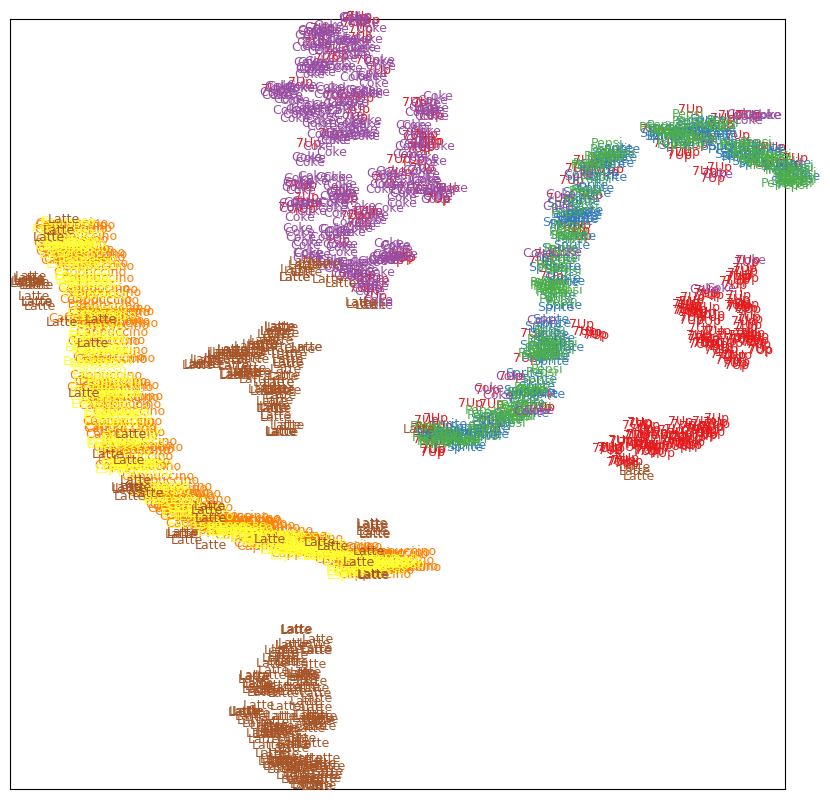

In [3]:
import matplotlib.pyplot as plt
from sklearn import manifold
#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(x)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(10, 10))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]),color=plt.cm.Set1(color[i]),  
             fontdict={ 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1500 samples in 0.002s...
[t-SNE] Computed neighbors for 1500 samples in 0.023s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1500
[t-SNE] Computed conditional probabilities for sample 1500 / 1500
[t-SNE] Mean sigma: 24.399602
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.524612
[t-SNE] KL divergence after 1000 iterations: 0.383845


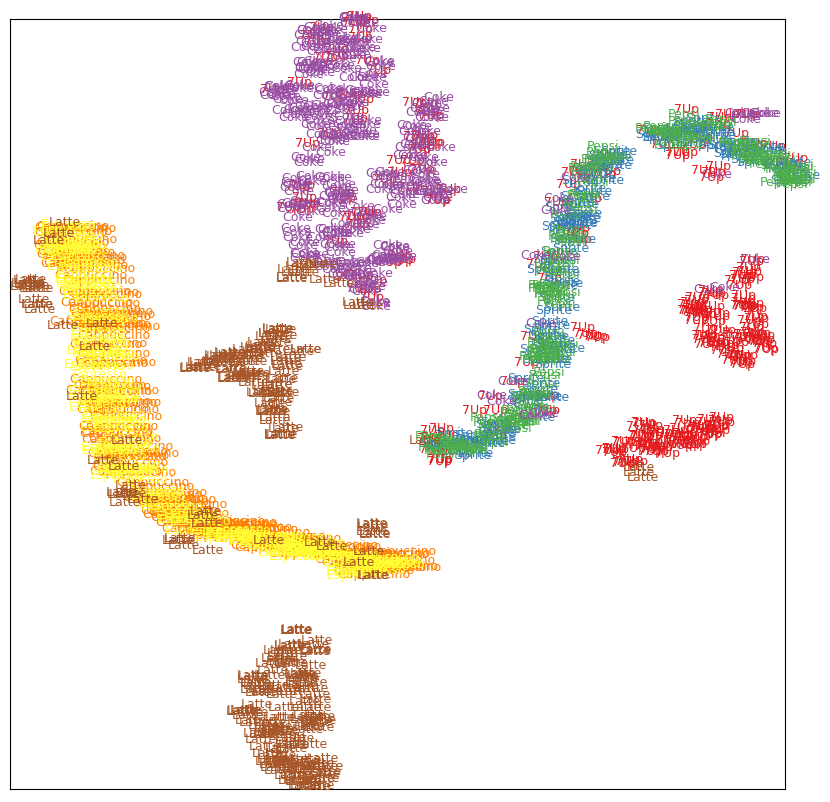

In [4]:
import matplotlib.pyplot as plt
from sklearn import manifold
#t-SNE
X_tsne = manifold.TSNE(n_components=2, init='random', random_state=5, verbose=1).fit_transform(x2)

#Data Visualization
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  #Normalize
plt.figure(figsize=(10, 10))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]),color=plt.cm.Set1(color[i]),  
             fontdict={ 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()